# Dolar Forecasting

This is a simple side project for dolar forecasting. Here I intend to work with the foundations of Machine Learning and build from scratch the algorithms. Without frameworks and librarys as Scikit Learn or Pytorch. Just simple Python code  

### Dataset

The dataset used in this project was extracted from ["Economática"](https://www.economatica.com/), a comprehensive platform for financial data. 

In June 1994, Brazil implemented the "Plano Real", a economic strategy that changed the country's currency. When the Real was introduced, his value was pegged to U.S dolar, this means that R$1 was equal to US$1.    

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
file_name = "dolar_dataset.xlsx"
dataset = pd.read_excel(file_name)

In [82]:
dataset.head(5)

,Mes_Ano,Fechamento
0,1994-06,1.000
1,1994-07,0.940
2,1994-08,0.889
3,1994-09,0.853
4,1994-10,0.846


The date column (Mes_Ano) was originally in YYYY-MM string formart. For a better analysis and aggregation, this column was split into two separate columns: 'Ano' (Year) and 'Mês' (Month). 

The column names were kept in their original Brazilian Portuguese and in the followind order:

* Mês = Month -> The reference month of observation
* Ano = Year -> The reference year of observation
* Fechamento = Closing Value -> The exchange rate of the U.S. Dollar (USD) to the Brazilian Real (BRL) at the end of the month

In [84]:
splited_data = dataset['Mes_Ano'].str.split('-', expand=True)
dataset = dataset.drop(columns=['Mes_Ano'])
dataset['Ano'] = pd.to_numeric(splited_data[0]) 
dataset['Mês'] = splited_data[1]

In [85]:
new_column_order = ['Mês', 'Ano', 'Fechamento']
dataset = dataset[new_column_order]

In [86]:
df_grouped_by_year = dataset.groupby('Ano', as_index=False)['Fechamento'].mean()

[]

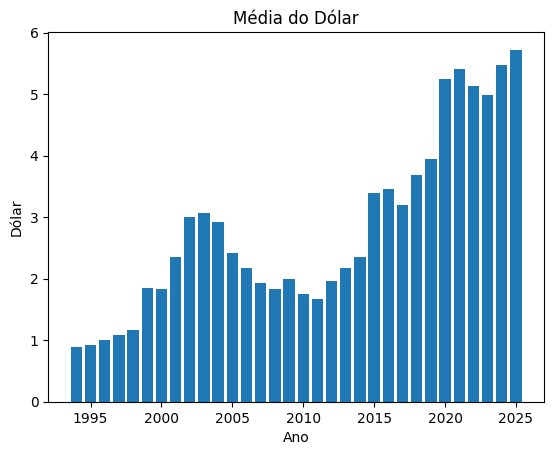

In [87]:
plt.bar(df_grouped_by_year['Ano'], df_grouped_by_year['Fechamento'])
plt.title('Média do Dólar')
plt.xlabel('Ano')
plt.ylabel('Dólar')
plt.plot()

In [88]:
df_five_years_grouped = dataset.copy()

In [89]:
initial_year = df_five_years_grouped['Ano'].min()
group_identifier = (df_five_years_grouped['Ano'] - initial_year) // 5
period_start_year = initial_year + (group_identifier*5)
df_five_years_grouped['Período'] = period_start_year.astype(str) + '-' + (period_start_year + 4).astype(str)

df_five_years_grouped = df_five_years_grouped.groupby('Período', as_index=False)['Fechamento'].mean()

In [90]:
df_five_years_grouped

,Período,Fechamento
0,1994-1998,1.024169
1,1999-2003,2.419515
2,2004-2008,2.252198
3,2009-2013,1.910637
4,2014-2018,3.216028
5,2019-2023,4.943412
6,2024-2028,5.556933


[]

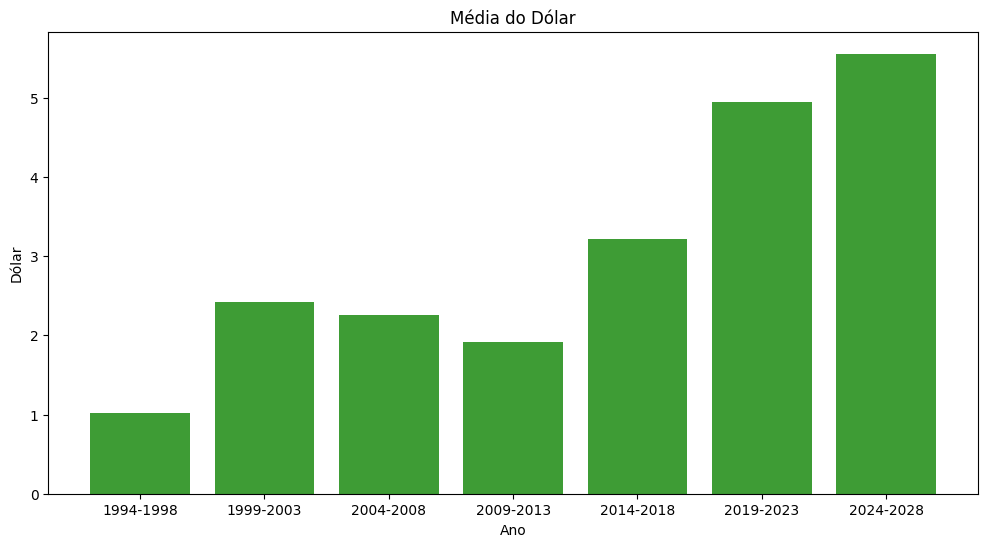

In [91]:
plt.figure(figsize=(12,6))
plt.bar(df_five_years_grouped['Período'], df_five_years_grouped['Fechamento'], color='#3e9c35')
plt.title('Média do Dólar')
plt.ylabel('Dólar')
plt.xlabel('Ano')
plt.plot()